In [1]:
#モジュールの読み込み
from __future__ import print_function

import pandas as pd
from pandas import Series,DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam


Using TensorFlow backend.


In [2]:
#CSVファイルの読み込み
data_set = pd.read_csv("Sample_Data.csv",sep=",",header=0)

data_set.head(3)

,x1,x2,x3,x4,S
0,0.100036,0.203581,0.216743,0.515304,4.254309
1,0.342848,0.139760,0.291864,0.308383,3.814346
2,0.964720,0.766296,0.133066,0.868645,9.103817


In [3]:

# データの分割
(train, test) = train_test_split(data_set, test_size=0.2, shuffle=True)


#data_set.columns = ['time','country','case','cure','death','longitude','latitude']


x_train = train.loc[:, ['x1','x2','x3','x4']]
y_train = train.loc[:, ['S']]

x_test = test.loc[:, ['x1','x2','x3','x4']]
y_test = test.loc[:, ['S']]

#データの整形
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

y_train = y_train.astype(np.float)
y_test = y_test.astype(np.float)

In [4]:
x_train

,x1,x2,x3,x4
21,0.453564,0.520169,0.732666,0.312370
28,0.999965,0.163180,0.105153,0.907070
8,0.634315,0.576914,0.620416,0.621682
13,0.767360,0.119071,0.880698,0.704071
26,0.099932,0.829353,0.145494,0.936142
22,0.431921,0.784863,0.954880,0.042940
7,0.792167,0.617942,0.393902,0.548985
5,0.058206,0.678211,0.611706,0.997217
14,0.139259,0.403947,0.592935,0.344240
11,0.019445,0.608386,0.092076,0.475545


In [6]:
x_test

,x1,x2,x3,x4
25,0.292910,0.057232,0.458552,0.611875
16,0.028333,0.662840,0.488123,0.151857
20,0.705857,0.737297,0.911045,0.689668
4,0.989781,0.178079,0.664460,0.217744
24,0.776486,0.117143,0.417635,0.641116
17,0.732526,0.020149,0.968638,0.433540


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


Train on 23 samples, validate on 6 samples
Epoch 1/100
23/23 [==============================] - 1s 60ms/step - loss: 51.4408 - mean_squared_error: 51.4140 - val_loss: 50.8158 - val_mean_squared_error: 50.7891
Epoch 2/100
23/23 [==============================] - 0s 421us/step - loss: 50.4442 - mean_squared_error: 50.4175 - val_loss: 49.8212 - val_mean_squared_error: 49.7947
Epoch 3/

23/23 [==============================] - 0s 756us/step - loss: 1.7942 - mean_squared_error: 1.7672 - val_loss: 1.7241 - val_mean_squared_error: 1.6970
Epoch 46/100
23/23 [==============================] - 0s 648us/step - loss: 1.4549 - mean_squared_error: 1.4278 - val_loss: 1.4244 - val_mean_squared_error: 1.3972
Epoch 47/100
23/23 [==============================] - 0s 571us/step - loss: 1.2309 - mean_squared_error: 1.2037 - val_loss: 1.1921 - val_mean_squared_error: 1.1649
Epoch 48/100
23/23 [==============================] - 0s 487us/step - loss: 1.0369 - mean_squared_error: 1.0097 - val_loss: 1.0197 - val_mean_squared_error: 0.9924
Epoch 49/100
23/23 [==============================] - 0s 918us/step - loss: 0.8980 - mean_squared_error: 0.8707 - val_loss: 0.8882 - val_mean_squared_error: 0.8609
Epoch 50/100
23/23 [==============================] - 0s 874us/step - loss: 0.8005 - mean_squared_error: 0.7732 - val_loss: 0.7906 - val_mean_squared_error: 0.7633
Epoch 51/100
23/23 [=========

23/23 [==============================] - 0s 447us/step - loss: 0.4752 - mean_squared_error: 0.4493 - val_loss: 0.4522 - val_mean_squared_error: 0.4263
Epoch 96/100
23/23 [==============================] - 0s 495us/step - loss: 0.4727 - mean_squared_error: 0.4468 - val_loss: 0.4550 - val_mean_squared_error: 0.4292
Epoch 97/100
23/23 [==============================] - 0s 540us/step - loss: 0.4699 - mean_squared_error: 0.4441 - val_loss: 0.4562 - val_mean_squared_error: 0.4304
Epoch 98/100
23/23 [==============================] - 0s 413us/step - loss: 0.4676 - mean_squared_error: 0.4418 - val_loss: 0.4553 - val_mean_squared_error: 0.4295
Epoch 99/100
23/23 [==============================] - 0s 415us/step - loss: 0.4661 - mean_squared_error: 0.4404 - val_loss: 0.4554 - val_mean_squared_error: 0.4297
Epoch 100/100
6/6 [==============================] - 0s 221us/step


Test loss: 0.4541042149066925
Test mean_squared_error 0.4283866584300995


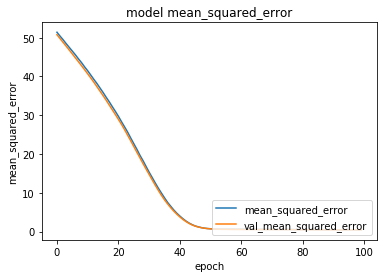

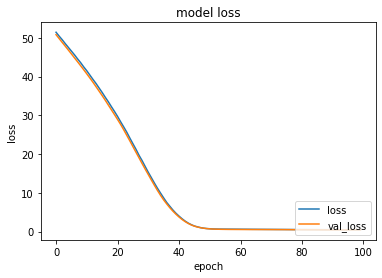

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers


#ニューラルネットワークの実装
model = Sequential()

model.add(Dense(20, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(4,)))
#model.add(Dropout(0.1))

model.add(Dense(20, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(4,)))
#model.add(Dropout(0.1))

model.add(Dense(1, activation='linear'))



model.summary()
print("\n")



#ニューラルネットワークの実装②
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


early_stopping = EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0,
                        patience=50,
                )

# val_lossの改善が20エポック見られなかったら、学習率を0.7倍する。
reduce_lr = ReduceLROnPlateau(
                        monitor='val_loss',
                        factor=0.7,
                        patience=20,
                        min_lr=0.001
                )

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=10,epochs=100,verbose=1,validation_data=(x_test, y_test),callbacks=[early_stopping, reduce_lr])

#ニューラルネットワークの推論
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test mean_squared_error",score[1])


def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('model mean_squared_error')
    plt.xlabel('epoch')
    plt.ylabel('mean_squared_error')
    plt.legend(['mean_squared_error', 'val_mean_squared_error'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()


# 学習履歴をプロット
plot_history(history)



In [ ]:
#新たなデータで学習したモデルを使ってみる

In [8]:
#CSVファイルの読み込み
data_set = pd.read_csv("Predict_Data.csv",sep=",",header=0)

data_set.head(5)

,x1,x2,x3,x4,S
0,0.118708,0.937427,0.307206,0.469041,6.623726
1,0.275776,0.426435,0.072642,0.681728,5.530067
2,0.505760,0.051332,0.346642,0.507685,5.090509
3,0.332887,0.530420,0.305199,0.191143,4.433543
4,0.939669,0.608966,0.791664,0.541639,9.581091


In [9]:
x_pred = data_set.loc[:, ['x1','x2','x3','x4']]
x_pred = x_pred.astype(np.float)

print(x_pred)


         x1        x2        x3        x4
0  0.118708  0.937427  0.307206  0.469041
1  0.275776  0.426435  0.072642  0.681728
2  0.505760  0.051332  0.346642  0.507685
3  0.332887  0.530420  0.305199  0.191143
4  0.939669  0.608966  0.791664  0.541639


In [10]:
#モデルを使って予測
predictions = model.predict(x_pred)
print(predictions)

[[7.079001 ]
 [5.6783977]
 [5.2441587]
 [5.3599224]
 [8.793647 ]]
